In [7]:
#MILESTONE 2 ASSIGNMENT
#PCA AND LOGISTIC REGRESSION

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [35]:
#load the dataset
cancer_data = load_breast_cancer()
x = cancer_data.data
y = cancer_data.target
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

#Check for missing values
print("Checking for missing values:")
print(X.isnull().sum())

Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [ ]:
#From the above, there are no missing values.

In [39]:
#Display basic statistics
print("\nBasic statistics of the dataset:")
print(X.describe())
print(X.head())


Basic statistics of the dataset:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000

In [ ]:
#The dataset has 8 rows and 30 colums as shown above with the head() providing details the first 5 rows of the dataset.

In [13]:
#Implement PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
#initializa PCA
pca = PCA(n_components=2)

#fit and transform the data
X_pca = pca.fit_transform(x)

#Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

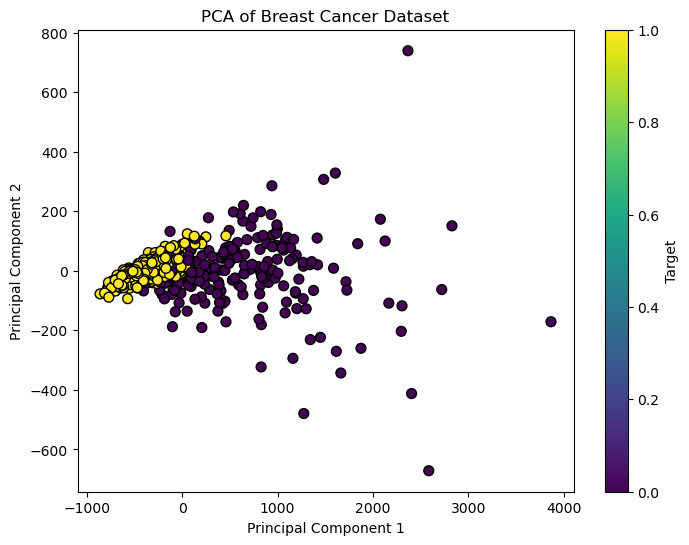

In [19]:
#Visualizing the results of PCA components

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()

In [ ]:
#The above graph shows a plot of PC1 against PC2. Each point on the scatter plot corresponds to a sample from the dataset represent a patient. 
#The color coding is based on the target variables as to whether they are malignant or benign tumors. We also observe some outliers as well.
#We also observe the two classes are well separated with only a few overlaps. There are basically two clusters observed from this plot as shown above.

In [21]:
#Implementing Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


In [23]:
#Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [25]:
#Initialize and fit the logistic regression model

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
#Predict the model
y_pred = log_model.predict(X_test)

#Evaluate the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Accuracy
#accuracy = accuracy_score(y_test, y_pred)

[[39  4]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
#Interpretation of the Logistic Regression results
#The confusion matrix shows that we have 39 true negatives and 4 false positives; whereas there are no false negatives and 71 true positives.

#A high precision score of 1.00 and 0.95  shows that the model os likely correct in predicting a malignant tumor.
#A high recall indicates that the model is indeed precise in identifying malignant tumors, and minimizes the chances of missing a cancer diagnosis.
#The F1-score shows that the model performed well overall.
#With an accuracy of 0.96, we can see that as a whole the model performed well on the given dataset.
